In [2]:
# This script plots some locations of subglacial lakes on top of the
# ICESat-2 ATL15 data map
import sys
sys.path.insert(0, '../source')
sys.path.insert(0, '../scripts')

from matplotlib.colors import to_hex
from load_lakes import gdf
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import griddata


# # import the ATL15 data. edit the path to the data as appropriate
fn = '../../../ICESat-2/ATL15/ATL15_AA_0314_01km_002_02.nc'
ds = nc.Dataset(fn)
dsh = ds['delta_h']


In [3]:
# define some variables
dh = dsh['delta_h'][:]        # elevation change (m)
x = dsh['x'][:]               # x coordinate array (m)
y = dsh['y'][:]               # y coordinate array (m)
mask = dsh['ice_area'][:]
t = dsh['time'][:]            # y coordinate array (m)


In [4]:
# Select subglacial lakes from inventory

# Byrd_s10 coordinates
lake_name = 'Byrd_s10'
outline = gdf.loc[gdf['name'] == lake_name]
xB = float(outline.centroid.x)*1e3
yB = float(outline.centroid.y)*1e3


# Slessor_23
lake_name = 'Slessor_23'
outline = gdf.loc[gdf['name'] == lake_name]
xS = float(outline.centroid.x)*1e3
yS = float(outline.centroid.y)*1e3

# Mac1
lake_name = 'Mac1'
outline = gdf.loc[gdf['name'] == lake_name]
xMa = float(outline.centroid.x)*1e3
yMa = float(outline.centroid.y)*1e3


# Mercer
lake_name = 'MercerSubglacialLake'
outline = gdf.loc[gdf['name'] == lake_name]
xMe = float(outline.centroid.x)*1e3
yMe = float(outline.centroid.y)*1e3

# Thwaites_170
lake_name = 'Thw_170'
outline = gdf.loc[gdf['name'] == lake_name]
xT = float(outline.centroid.x)*1e3
yT = float(outline.centroid.y)*1e3


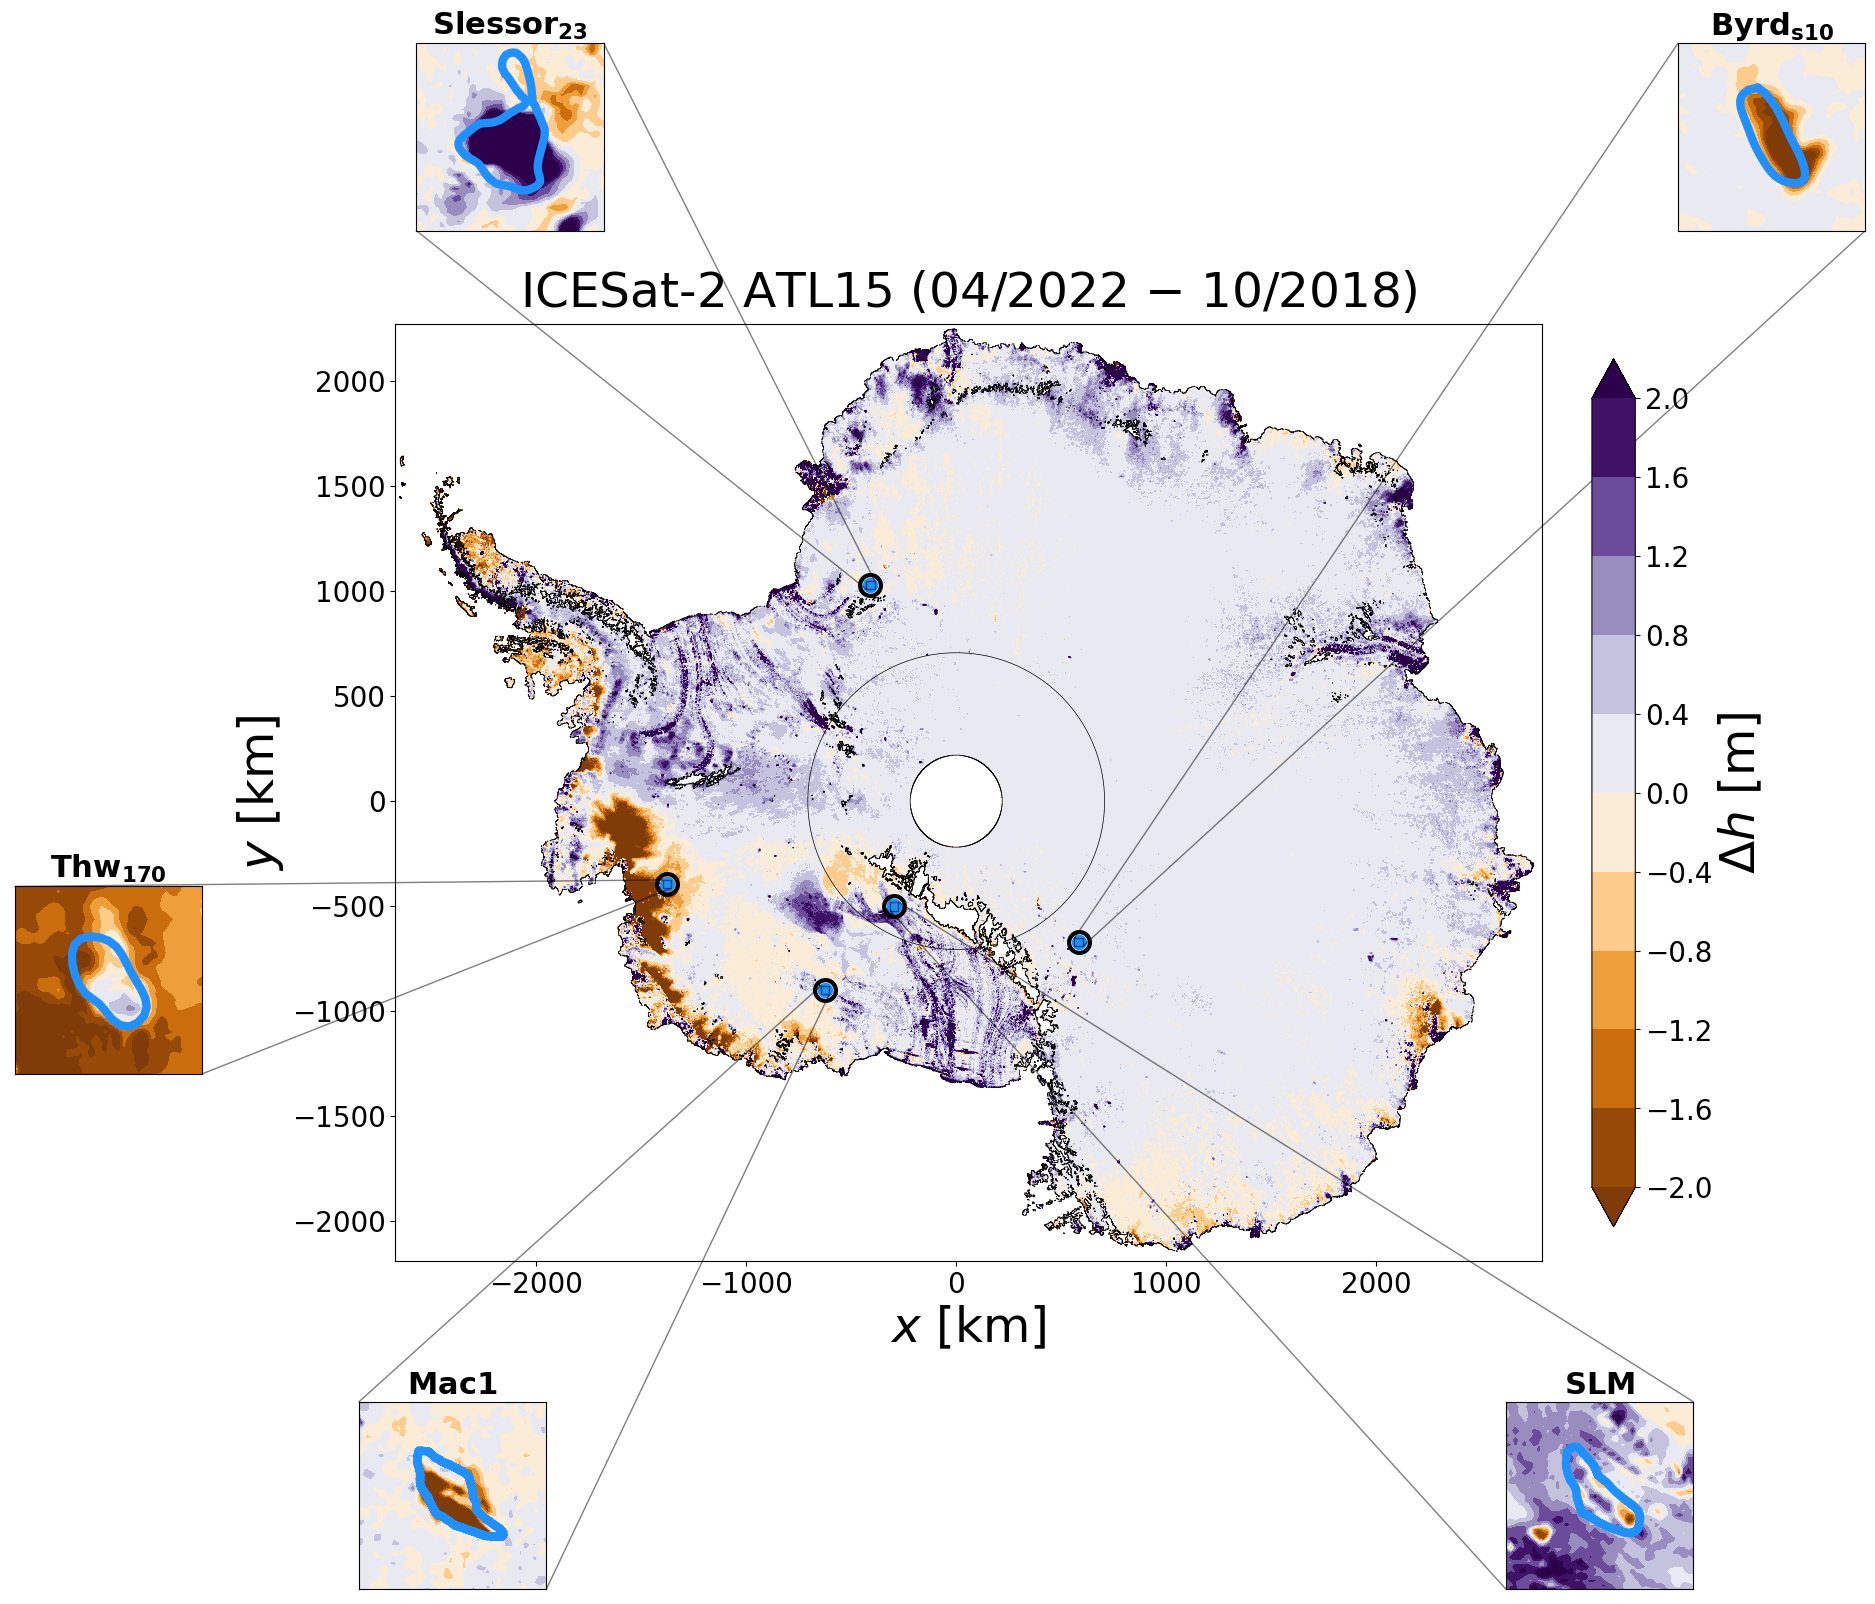

In [5]:
# Plot lake locations on map of elevation change!

points_x = np.array([xB, xS, xT, xMa, xMe])/1e3
points_y = np.array([yB, yS, yT, yMa, yMe])/1e3

dh_0 = dh[-1, :, :]-dh[0, :, :]
mask_0 = mask[-1, :, :]  

plt.figure(figsize=(16, 16))
plt.title(r'ICESat-2 ATL15 (04/2022 $-$ 10/2018)', y=1.01,fontsize=35)
p1 = plt.contourf(x/1000, y/1000, dh_0, cmap='PuOr',
                  levels=np.linspace(-2,2,11), extend='both')
plt.plot([points_x[-1]], [points_y[-1]], marker=r'o',markerfacecolor='none', color='k', markersize=15,markeredgewidth=3)
plt.plot([points_x[0]], [points_y[0]], marker=r'o',markerfacecolor='none', color='k', markersize=15,markeredgewidth=3)
plt.plot([points_x[1]], [points_y[1]], marker=r'o',markerfacecolor='none',color='k', markersize=15,markeredgewidth=3)
plt.plot([points_x[2]], [points_y[2]], marker=r'o', markerfacecolor='none',color='k', markersize=15,markeredgewidth=3)
plt.plot([points_x[3]], [points_y[3]], marker=r'o', markerfacecolor='none',color='k', markersize=15,markeredgewidth=3)


plt.plot([points_x[-1]], [points_y[-1]], marker=r'o',
         color='dodgerblue', markersize=10)
plt.plot([points_x[0]], [points_y[0]], marker=r'o',
         color='dodgerblue', markersize=10)
plt.plot([points_x[1]], [points_y[1]], marker=r'o',
         color='dodgerblue', markersize=10)
plt.plot([points_x[2]], [points_y[2]], marker=r'o',
         color='dodgerblue', markersize=10)
plt.plot([points_x[3]], [points_y[3]], marker=r'o',
         color='dodgerblue', markersize=10)
plt.contour(x/1000, y/1000, mask_0, colors='k', linewidths=0.5)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel(r'$y$ [km]', fontsize=35)
plt.xlabel(r'$x$ [km]', fontsize=35)
plt.gca().set_aspect('equal', 'box')
cbar = plt.colorbar(p1, ticks=np.linspace(-2,2,11),
                    orientation='vertical', fraction=0.035, pad=0.04)
cbar.set_label(r'$\Delta h$ [m]', fontsize=35)
cbar.ax.tick_params(labelsize=20)

#INSET 1: Byrd-s10
axins = plt.gca().inset_axes([1.1, 1.1, 0.2, 0.2])
axins.contourf(x/1000, y/1000, dh_0, cmap='PuOr',
                  levels=np.linspace(-2,2,11), extend='both')
x1, x2, y1, y2 = points_x[0]-20, points_x[0]+20, points_y[0]-20, points_y[0]+20
outline = gdf.loc[gdf['name']=='Byrd_s10']
outline.plot(edgecolor='dodgerblue',facecolor='none',ax=axins,linewidth=6)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xticks([])
axins.set_yticks([])
axins.set_title(r'$\mathrm{\mathbf{Byrd_{s10}}}$', fontsize=22)
axins.set_aspect('equal', 'box')
plt.gca().indicate_inset_zoom(axins, edgecolor="black")

#INSET 2: Slessor-23 
axins = plt.gca().inset_axes([0.0, 1.1, 0.2, 0.2])
axins.contourf(x/1000, y/1000, dh_0, cmap='PuOr',
                  levels=np.linspace(-2,2,11), extend='both')
x1, x2, y1, y2 = points_x[1]-20, points_x[1]+20, points_y[1]-20, points_y[1]+20
outline = gdf.loc[gdf['name']=='Slessor_23']
outline.plot(edgecolor='dodgerblue',facecolor='none',ax=axins,linewidth=6)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xticks([])
axins.set_yticks([])
axins.set_title(r'$\mathrm{\mathbf{Slessor_{23}}}$', fontsize=22)
axins.set_aspect('equal', 'box')
plt.gca().indicate_inset_zoom(axins, edgecolor="black")


#INSET 3: Thw-170
axins = plt.gca().inset_axes([-0.35, 0.2, 0.2, 0.2])
axins.contourf(x/1000, y/1000, dh_0, cmap='PuOr',
                  levels=np.linspace(-2,2,11), extend='both')
x1, x2, y1, y2 = points_x[2]-20, points_x[2]+20, points_y[2]-20, points_y[2]+20
outline = gdf.loc[gdf['name']=='Thw_170']
outline.plot(edgecolor='dodgerblue',facecolor='none',ax=axins,linewidth=6)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_title(r'$\mathrm{\mathbf{Thw_{170}}}$', fontsize=22)
axins.set_aspect('equal', 'box')
plt.gca().indicate_inset_zoom(axins, edgecolor="black")

#INSET 4: Mac1
axins = plt.gca().inset_axes([-0.05, -0.35, 0.2, 0.2])
axins.contourf(x/1000, y/1000, dh_0, cmap='PuOr',
                  levels=np.linspace(-2,2,11), extend='both')
x1, x2, y1, y2 = points_x[3]-20, points_x[3]+20, points_y[3]-20, points_y[3]+20
outline = gdf.loc[gdf['name']=='Mac1']
outline.plot(edgecolor='dodgerblue',facecolor='none',ax=axins,linewidth=6)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_title(r'$\mathrm{\mathbf{Mac1}}$', fontsize=22)
axins.set_aspect('equal', 'box')
plt.gca().indicate_inset_zoom(axins, edgecolor="black")

#INSET 5: Mercer
axins = plt.gca().inset_axes([0.95, -0.35, 0.2, 0.2])
axins.contourf(x/1000, y/1000, dh_0, cmap='PuOr',
                  levels=np.linspace(-2,2,11), extend='both')
x1, x2, y1, y2 = points_x[4]-20, points_x[4]+20, points_y[4]-20, points_y[4]+20
outline = gdf.loc[gdf['name']=='MercerSubglacialLake']
outline.plot(edgecolor='dodgerblue',facecolor='none',ax=axins,linewidth=6)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_title(r'$\mathrm{\mathbf{SLM}}$', fontsize=22)
axins.set_aspect('equal', 'box')
plt.gca().indicate_inset_zoom(axins, edgecolor="black")

plt.savefig('map', bbox_inches='tight')
plt.show()
plt.close()
